In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
X,y = digits.data, digits.target

In [4]:
from sklearn.model_selection import learning_curve, train_test_split

In [5]:
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import keras.backend as k

Using TensorFlow backend.


In [6]:
k.clear_session()

model = Sequential()
model.add(Dense(16, input_dim = 64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [7]:
'''storing the initial weights to have a meaningful comparision'''

ini_w = model.get_weights()
y = to_categorical(y)

In [8]:
'''train test split'''

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
train_sizes = (len(X_train)*np.linspace(0.1,0.999,4)).astype(int)

In [9]:
'''evaluating different train size data'''

train_scores=[]
test_scores=[]

for size in train_sizes:
    X_,_, y_,_ = train_test_split(X_train, y_train, train_size = size)
    model.set_weights(ini_w) # to evaluate the same model
    
    h = model.fit(X_, y_, epochs=300, verbose=0, callbacks=[EarlyStopping(monitor='loss', patience=1)])
    res = model.evaluate(X_, y_, verbose=0)
    train_scores.append(res[-1])
    
    e = model.evaluate(X_test, y_test, verbose=0)
    test_scores.append(e[-1])
    

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


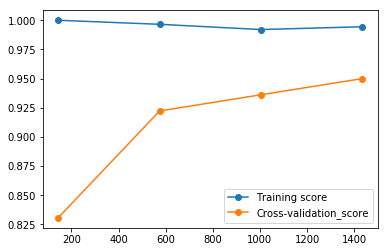

In [11]:
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label = "Cross-validation_score")
plt.legend(loc="best")

# Batch normalization

In [18]:
from keras.layers import BatchNormalization

In [27]:
'''helper function to train with the batch normalization flag'''

def repeated_training(X_train, y_train, X_test, y_test, units=512, activation = 'sigmoid', optimizer='sgd', do_bn=False,
                     epochs=10, repeats=3):
    
    hist=[]
    for repeat in range(repeats):
        k.clear_session()
        
        model = Sequential()
        
        model.add(Dense(units, input_shape=X_train.shape[1:], kernel_initializer='normal', activation=activation))
        if do_bn:
            model.add(BatchNormalization()) #just add the layer
        
        model.add(Dense(units, kernel_initializer='normal', activation=activation))
        
        if do_bn:
            model.add(BatchNormalization())
            
        model.add(Dense(units, kernel_initializer='normal', activation=activation))
        
        if do_bn:
            model.add(BatchNormalization())
            
        model.add(Dense(10, activation='softmax'))
        
        model.compile(optimizer, 'categorical_crossentropy', metrics=['accuracy'])
        
        h = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0)
        hist.append([h.history['acc'], h.history['val_acc']])
        
        print(repeat, end=' ')
        
    hist = np.array(hist)
    
    mean_acc = hist.mean(axis=0)
    std_acc = hist.std(axis=0)
    
    return mean_acc[0], std_acc[0], mean_acc[1], std_acc[1]

In [26]:
mean_acc, std_acc, mean_val_acc, std_acc_val = repeated_training(X_train, y_train, X_test, y_test, do_bn=False)

012

In [28]:
mean_acc_bn, std_acc_bn, mean_val_acc_bn, std_acc_val_bn = repeated_training(X_train, y_train, X_test, y_test, do_bn=True)

0 1 2 

In [29]:
def plot_mean_std(m,s):
    plt.plot(m)
    plt.fill_between(range(len(m)), m-s, m+s, alpha=.1)

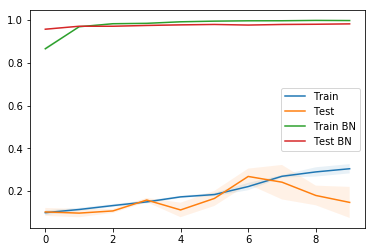

In [32]:
'''huge impact upon implementing the batch normalization'''

plot_mean_std(mean_acc, std_acc)
plot_mean_std(mean_val_acc, std_acc_val)
plot_mean_std(mean_acc_bn, std_acc_bn)
plot_mean_std(mean_val_acc_bn, std_acc_val_bn)

plt.legend(['Train', 'Test','Train BN', 'Test BN'])

# DROP OUT

In [33]:
from keras.layers import Dropout

In [ ]:
'''Drop out Neural Network'''

model = Sequential()
model.add(Dropout(0.2, input_shape=X_train.shape[1:])) # dropping the fraction of inputs

model.add(Dense(512, kernel_initializer='normal',kernel_regularizer='l2',  activation='sigmoid'))

model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile('sgd', 'categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation

In [35]:
# making more data
# and one more is to modify the data by loooping before feeding to the data and then just feeding
# rather storing all the data in the space

# called continuous leaerning as we keep on modifying till learned - epochs dont define well so use batch size

In [36]:
from keras.preprocessing.image import  ImageDataGenerator

In [37]:
gen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1, 
                        rotation_range=20, shear_range=.3, zoom_range=0.3, horizontal_flip=True) 

In [38]:
train = gen.flow_from_directory('../../data/generator', target_size=(128,128), batch_size=12, class_mode='binary')

Found 1 images belonging to 1 classes.


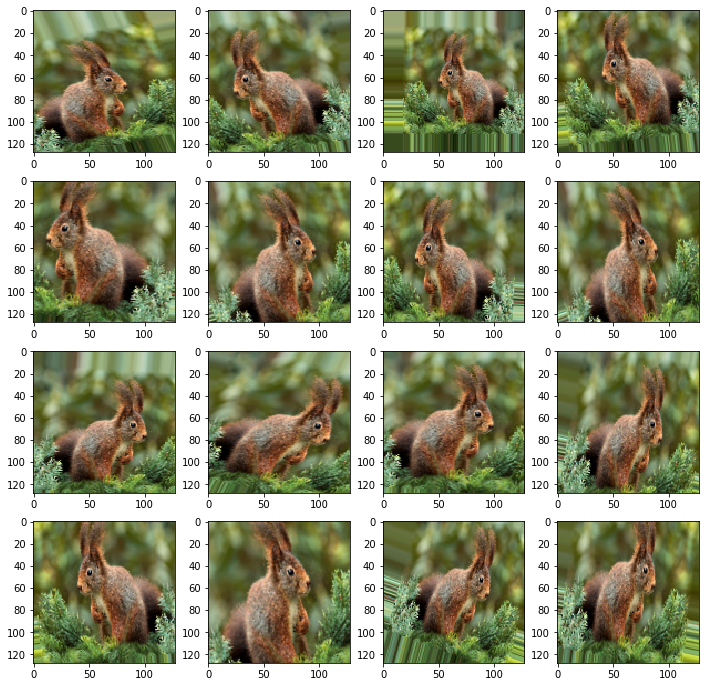

In [40]:
plt.figure(figsize=(12,12))

for i in range(16):
    img, label = train.next()
    plt.subplot(4,4,i+1)
    plt.imshow(img[0])

# Hyper parameter

In [41]:
# random
# grid
# bayesian search

# Embedding

In [42]:
from keras.layers import Embedding

In [43]:
'''Embedding Neural Network'''

model = Sequential()

model.add(Embedding(input_dim=100, output_dim=2))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 2)           200       
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


In [44]:
emb = model.predict(np.array([[81,1,96,79], 
                              [17,47,69,50],
                              [49,3,12,88]]))

In [45]:
emb.shape

(3, 4, 2)

In [46]:
emb

array([[[-0.0180997 ,  0.02802208],
        [-0.031696  , -0.00688267],
        [-0.04987928,  0.02655289],
        [-0.03050785,  0.0059633 ]],

       [[ 0.04500892,  0.00532221],
        [-0.01992524, -0.03754591],
        [-0.02928953,  0.00989323],
        [-0.02113417, -0.02581834]],

       [[ 0.04856885, -0.04239219],
        [-0.04660443,  0.0457995 ],
        [-0.037844  , -0.01743229],
        [ 0.04628653, -0.02544165]]], dtype=float32)

# Recommendation system

In [77]:
from keras.datasets import imdb

In [78]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=None, skip_top=0, maxlen=None, start_char=1, 
                                                      oov_char=2, index_from=3)

In [79]:
X_train.shape

(25000,)

In [81]:
'''building the word index dictionary for sentiment classification'''

idx = imdb.get_word_index()
idx ={j:i for i,j in idx.items()}

In [85]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM

In [86]:
'''padding the reviews'''

maxlen=100

X_train_pad = pad_sequences(X_train, maxlen=maxlen)
X_test_pad = pad_sequences(X_test, maxlen=maxlen)

In [87]:
X_train_pad.shape

(25000, 100)

In [88]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [89]:
X_train_pad[0]

array([ 1415,    33,     6,    22,    12,   215,    28,    77,    52,
           5,    14,   407,    16,    82, 10311,     8,     4,   107,
         117,  5952,    15,   256,     4, 31050,     7,  3766,     5,
         723,    36,    71,    43,   530,   476,    26,   400,   317,
          46,     7,     4, 12118,  1029,    13,   104,    88,     4,
         381,    15,   297,    98,    32,  2071,    56,    26,   141,
           6,   194,  7486,    18,     4,   226,    22,    21,   134,
         476,    26,   480,     5,   144,    30,  5535,    18,    51,
          36,    28,   224,    92,    25,   104,     4,   226,    65,
          16,    38,  1334,    88,    12,    16,   283,     5,    16,
        4472,   113,   103,    32,    15,    16,  5345,    19,   178,
          32], dtype=int32)

In [92]:
# finding the maximum no of features

max_f = max([max(x) for x in X_train_pad] + [max(x) for x in X_test_pad])+1
max_f

88587

In [93]:
'''LSTM sentiment analysis'''

model = Sequential()
model.add(Embedding(max_f, 128)) 
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         11339136  
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 11,388,609
Trainable params: 11,388,609
Non-trainable params: 0
_________________________________________________________________


In [94]:
'''Training the LSTM'''

model.fit(X_train_pad, y_train, batch_size=32, epochs=2, validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/2
17500/17500 [==============================] - 185s 11ms/step - loss: 0.4740 - acc: 0.7738 - val_loss: 0.4003 - val_acc: 0.8196
Epoch 2/2
17500/17500 [==============================] - 170s 10ms/step - loss: 0.2626 - acc: 0.9004 - val_loss: 0.3920 - val_acc: 0.8299


In [95]:
'''LSTM accuracy'''

score,acc = model.evaluate(X_test_pad, y_test)
print(score, acc)

25000/25000 [==============================] - 25s 980us/step
0.3990792329788208 0.82404
